# Week 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import SGDRegressor
import seaborn as sns

## Exercise 1

#### 1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line. 
#### 2. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car. 
#### 3. What is the mpg of a car, whose weight is 5.5? 
#### 4. Compute and print accuracy measures such as RMSE and R2  for the test set.  
#### 5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

In [2]:
# Question 1
def myFnLinReg(x,y):
    if len(x)!= len(y):
        raise ValueError("x and y must have the same length!!")
    
    N = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi*yi for xi,yi in zip(x,y))
    sum_x2 = sum(xi*xi for xi in x)
    
    a1 = (N*sum_xy - sum_x*sum_y)/(N * sum_x2 - sum_x**2)
    a0 = (sum_y - a1 * sum_x)/N
    
    return a0 , a1

In [3]:
# Question 2
df = pd.read_csv("mtcars.csv")
df.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [4]:
df.isnull() # to check if there is any cell with a empty value

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
X = df['wt']
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)
a0,a1 = myFnLinReg(X_train,y_train)
print(f"The value of the intercept a0: {a0}")
print(f"The value of the coefficient a1: {a1}")

The value of the intercept a0: 36.93731031351835
The value of the coefficient a1: -5.3369414005570635


In [6]:
# Question 3
sol = a0 + a1*5.5
print(f"The mpg of the car whose weight is 5.5 is {sol}")

The mpg of the car whose weight is 5.5 is 7.584132610454503


In [7]:
# Question 4
y_pred = a0 + a1* X_test
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 3.5321361326991396
R²: 0.6879761857596274


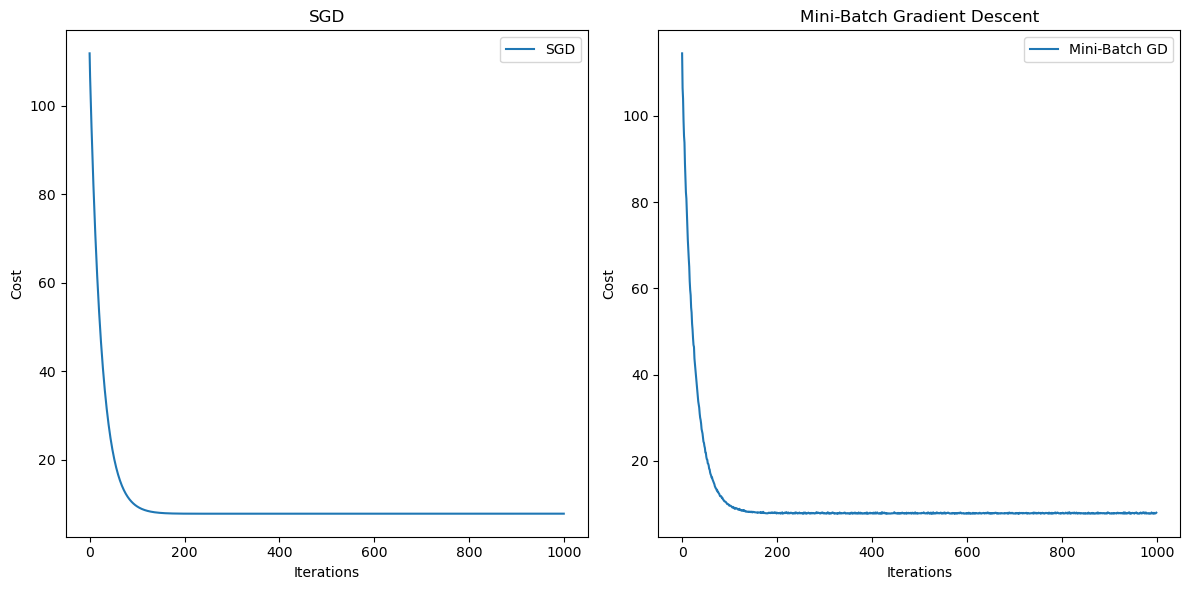

In [8]:
# Question 5

X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
learning_rate = 0.01
max_iter = 1000  
batch_size = 4   
sgd_regressor_sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=learning_rate, warm_start=True)
sgd_regressor_mbgd = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=learning_rate, warm_start=True)

cost_history_sgd = []
cost_history_mbgd = []


for _ in range(max_iter):
    for i in range(len(X_train_reshaped)):
        x_batch = X_train_reshaped[i:i+1] 
        y_batch = y_train.iloc[i:i+1]
        sgd_regressor_sgd.fit(x_batch, y_batch)
    cost = mean_squared_error(y_train, sgd_regressor_sgd.predict(X_train_reshaped))
    cost_history_sgd.append(cost)


for _ in range(max_iter):

    for i in range(0, len(X_train_reshaped), batch_size):
        x_batch = X_train_reshaped[i:i+batch_size] 
        y_batch = y_train.iloc[i:i+batch_size]

        sgd_regressor_mbgd.fit(x_batch, y_batch)
    cost = mean_squared_error(y_train, sgd_regressor_mbgd.predict(X_train_reshaped))
    cost_history_mbgd.append(cost)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cost_history_sgd, label="SGD")
plt.title("SGD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(cost_history_mbgd, label="Mini-Batch GD")
plt.title("Mini-Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()

plt.tight_layout()
plt.show()

## Exercise 2

#### 1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.  
#### 2. Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features.  (from sklearn.linear_model import LinearRegression)  
#### 3. Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [9]:
# Question 1
df2 = pd.read_csv("boston.csv")
df2.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df2.isnull() # to check for null values

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The top 5 features to predict MEDV is : Index(['rm', 'zn', 'black', 'dis', 'chas'], dtype='object')


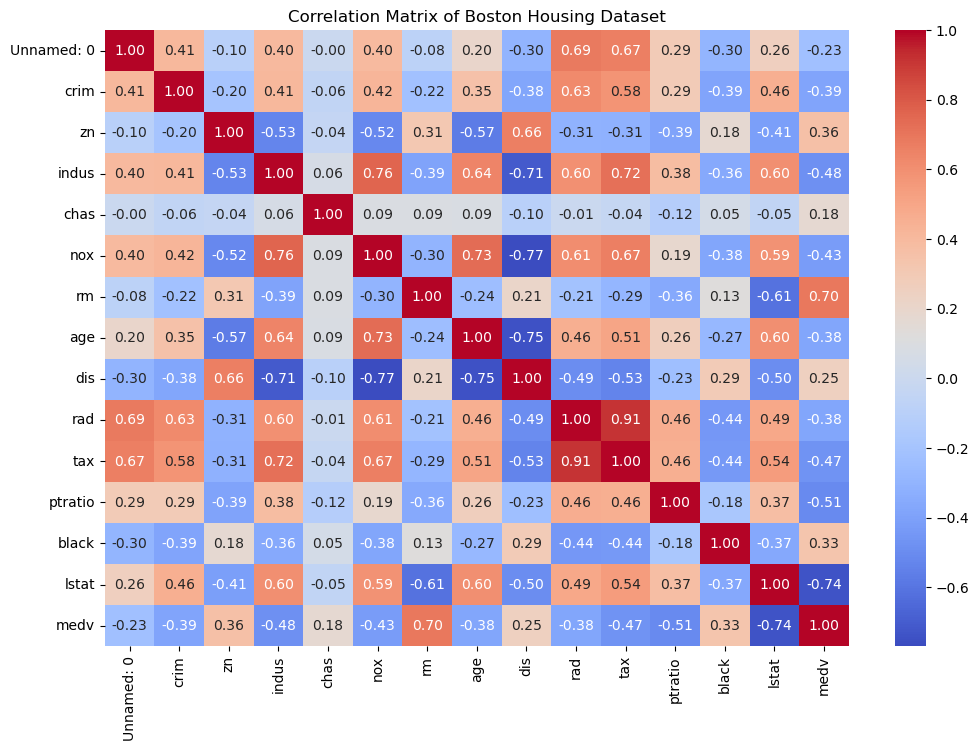

Correlation with MEDV:
medv          1.000000
rm            0.695360
zn            0.360445
black         0.333461
dis           0.249929
chas          0.175260
Unnamed: 0   -0.226604
age          -0.376955
rad          -0.381626
crim         -0.388305
nox          -0.427321
tax          -0.468536
indus        -0.483725
ptratio      -0.507787
lstat        -0.737663
Name: medv, dtype: float64


In [11]:
correlation_matrix = df2.corr()
top_5_features = correlation_matrix['medv'].sort_values(ascending=False).index[1:6]
print(f"The top 5 features to predict MEDV is : {top_5_features}")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Boston Housing Dataset")
plt.show()

print("Correlation with MEDV:")
print(correlation_matrix['medv'].sort_values(ascending=False))

In [12]:
# Question 2
best_3_features = top_5_features[:3]
x = df2[best_3_features]
Y = df2['medv']
model = linear_model.LinearRegression()
model.fit(x,Y)
b0 = model.intercept_
b1 = model.coef_
print(f"The value of the intercept b0: {b0}")
print(f"The value of the coefficients b1,b2 and b3: {b1}")

The value of the intercept b0: -37.91457871790817
The value of the coefficients b1,b2 and b3: [8.20692691 0.04898852 0.02330745]


In [13]:
# Question 3
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state=42)
model2 = linear_model.LinearRegression()
model2.fit(x_train,Y_train)
Y_pred = model.predict(x_test)

rmse_ = mean_squared_error(Y_test,Y_pred,squared= False)
r2_ = r2_score(Y_test,Y_pred)
print(f"The root mean squared error: {rmse_}")
print(f"The R squared value (Coefficient of Determination): {r2_}")

The root mean squared error: 6.2992266799790615
The R squared value (Coefficient of Determination): 0.4589089086129553
